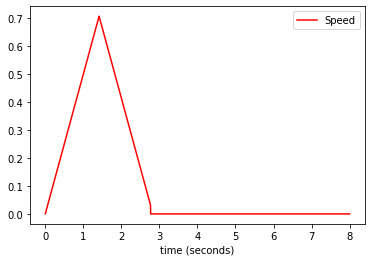

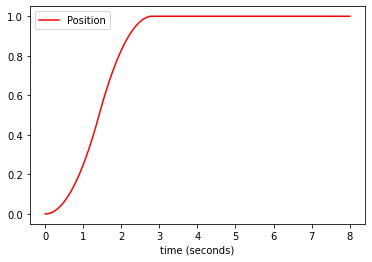

In [1]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.system.basic import *
from lib.system.trajectory import *
from lib.utils.time import *

pos_dp = DataPlotter()
pos_dp.set_x("time (seconds)")
pos_dp.add_y("pos", "Position")

spd_dp = DataPlotter()
spd_dp.set_x("time (seconds)")
spd_dp.add_y("speed", "Speed")

trajectory = VirtualRobot(1.0,    # 4 meters
                        1.0,      # vmax = 1 m/s
                        0.5, 0.5) # acc = dec = 0.5 m/s^2 

t = Time(use_fake_time = True)
t.start()

while t.get() < 8:
    
    t.sleep(0.001)
    delta_t = t.elapsed()
    trajectory.evaluate(delta_t)
    
    spd_dp.append_x(t.get())
    spd_dp.append_y("speed", trajectory.speed())
    
    pos_dp.append_x(t.get())
    pos_dp.append_y("pos", trajectory.position())
    
spd_dp.plot()
pos_dp.plot()
